# **Project Passwaord strength analysis using classical models**

# Import necessary libraries

In [ ]:
#load libraries
import pandas as pd      #machine learning tools
import numpy as np       #multi dimension and nemeric functions
import seaborn as sns    #uses Matplotlib underneath to plot graphs.
!pip install --upgrade scikit-learn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read and load dataset 

In [ ]:
data=pd.read_csv("data.csv",error_bad_lines=False)

<ipython-input-2-1b206e2c6846>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv("data.csv",error_bad_lines=False)
Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, s

In [ ]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


# Selecting 50000 rows of data 

using pandas drop function with range of index and than drop the rows so, we remove lasts rmaining rows

In [ ]:
data.drop(data.index[50000:669640], inplace=True)



In [ ]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
data.shape

(50000, 2)

In [ ]:
data.strength.unique()

array([1, 2, 0])

there are only 3 classes in Strength


*   0-> weak password

*   1->normal password

*   2->strong password 






In [ ]:
data.strength.unique()

array([1, 2, 0])

<Axes: xlabel='strength', ylabel='count'>

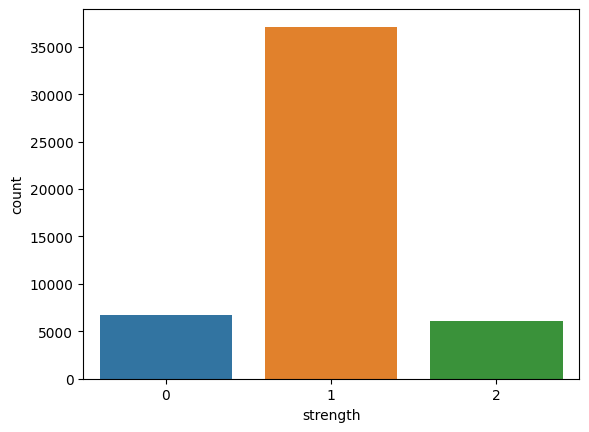

In [ ]:
# plot the distrebution of classes in the datasets
import seaborn as sns
import pandas as pd

graph = pd.DataFrame({'strength': data['strength']})
sns.countplot(x='strength', data=graph)


as we can see count of class 1 is high colpared to class 0 and class 2

In [ ]:
# change the data from svc file to array 
pass_tup=np.array(data)

In [ ]:
pass_tup

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['oqr9rw849O49r0', 2],
       ['une67lhn', 1],
       ['ahevomu852', 1]], dtype=object)

In [ ]:
type(pass_tup)

numpy.ndarray

In [ ]:
pass_tup[0]

array(['kzde5577', 1], dtype=object)

In [ ]:
#mix the data in the array 
import random
random.shuffle(pass_tup)
pass_tup


array([['kzde5577', 1],
       ['kzde5577', 1],
       ['kino3434', 1],
       ...,
       ['lyhini331', 1],
       ['magodeoz0', 1],
       ['joshkelly6', 1]], dtype=object)

In [ ]:
#create independent features  -- separate the columns each in independant array
x=[labels[0] for labels in pass_tup]
y=[labels[1] for labels in pass_tup]

In [ ]:
# check pass words
x

['kzde5577',
 'kzde5577',
 'kino3434',
 'visi7k1yr',
 'lamborghin1',
 'megzy123',
 'megzy123',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'AVYq1lDE4MgAZfNt',
 'u6c8vhow',
 'universe2908',
 'asv5o9yu',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'jytifok873',
 'AVYq1lDE4MgAZfNt',
 'universe2908',
 'WUt9IZzE0OQ7PkNE',
 'visi7k1yr',
 '612035180tok',
 'WUt9IZzE0OQ7PkNE',
 'universe2908',
 'universe2908',
 'idofo673',
 'lamborghin1',
 'faranumar91',
 'intel1',
 'lamborghin1',
 'WUt9IZzE0OQ7PkNE',
 '612035180tok',
 'v1118714',
 'schalke04',
 '612035180tok',
 'trabajonet9',
 'lsdlsd1',
 'exitos2009',
 'gaymaids1',
 'memjan123',
 'universe2908',
 'exitos2009',
 'faranumar91',
 'kino3434',
 'jytifok873',
 'faranumar91',
 'idofo673',
 'go7kew7a2po',
 'alimagik1',
 'universe2908',
 'sbl571017',
 'memjan123',
 'alimagik1',
 'kswa2mrv',
 'prisonbreak1',
 'WUt9IZzE0OQ7PkNE',
 'u6c8vhow',
 'kino3434',
 'ejeko677',
 'bozoxik602',
 'b4NbTxDEyNgG141J',
 'ok>bdk',
 'asv5o9yu',
 'czuodhj972',
 'fk9qi21m',
 'faranumar91'

In [ ]:
#check the classes 
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,


In [ ]:
# define the function that convert words into charecters  (example hello = {h, e,l,l,o} )
def word_divider(words):
    char=[]
    for i in words:
        char.append(i)
    return char

In [ ]:
#test the function
word_divider('asdf57')

['a', 's', 'd', 'f', '5', '7']

import TF-IDF vectorizer to convert String data into numerical data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from nltk.tokenize import word_tokenize

def createTokens(text):
    tokens = word_tokenize(text)
    return tokens

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=createTokens)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer=TfidfVectorizer(tokenizer=word_divider)


In [ ]:
X=vectorizer.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X.shape

(50000, 82)

In [ ]:
vectorizer.vocabulary_

{'k': 52,
 'z': 67,
 'd': 45,
 'e': 46,
 '5': 25,
 '7': 27,
 'i': 50,
 'n': 55,
 'o': 56,
 '3': 23,
 '4': 24,
 'v': 63,
 's': 60,
 '1': 21,
 'y': 66,
 'r': 59,
 'l': 53,
 'a': 42,
 'm': 54,
 'b': 43,
 'g': 48,
 'h': 49,
 '2': 22,
 'q': 58,
 'f': 47,
 't': 61,
 'u': 62,
 '6': 26,
 'c': 44,
 '8': 28,
 'w': 64,
 '9': 29,
 '0': 20,
 'j': 51,
 'p': 57,
 'x': 65,
 '>': 33,
 '@': 35,
 '-': 17,
 '!': 7,
 '.': 18,
 '&': 12,
 '?': 34,
 '<': 31,
 ';': 30,
 '_': 40,
 '%': 11,
 '±': 71,
 '"': 8,
 '~': 70,
 '+': 16,
 '^': 39,
 '/': 19,
 '$': 10,
 ')': 14,
 ' ': 6,
 '(': 13,
 '#': 9,
 '\\': 37,
 'ú': 79,
 '`': 41,
 '*': 15,
 '=': 32,
 '[': 36,
 '{': 68,
 ']': 38,
 '}': 69,
 'þ': 80,
 'ó': 77,
 '\x1c': 4,
 '¿': 74,
 '\x05': 0,
 '\x1b': 3,
 'å': 75,
 '‚': 81,
 '\x19': 2,
 '\x16': 1,
 'ò': 76,
 '·': 73,
 '\x1e': 5,
 'õ': 78,
 '³': 72}

In [ ]:
vectorizer.vocabulary_
try:
  vectorizer.vocabulary_
except:
  AttributeError


In [ ]:
first_document_vector=X[0]
first_document_vector

<1x82 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56938932],
        [0.        ],
        [0.58921175],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [ ]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.vocabulary_,columns=['TF-IDE'])

In [ ]:
df.sort_values(by=['TF-IDE'],ascending=False)

,TF-IDE
6,0.589212
t,0.569389
þ,0.335705
/,0.292022
_,0.286041
...,...
u,0.000000
f,0.000000
q,0.000000
2,0.000000


In [ ]:
# devide data into test and training data

from sklearn.model_selection import train_test_split

In [ ]:
#training data = 80%     --- test data = 20%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(40000, 82)

In [ ]:
X_test.shape

(10000, 82)

# **Machine learning models**

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# create the model2
clf = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial')

In [ ]:
#train the model 2 
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=0, solver='saga')

In [ ]:
# on X_test
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 2, 1, 2])

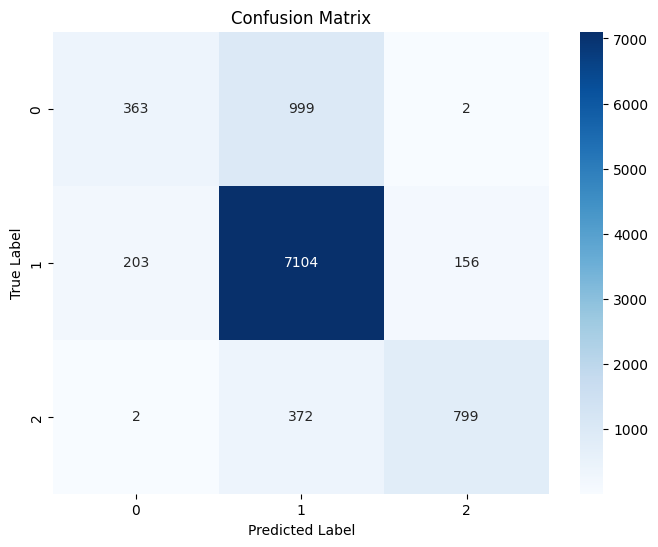

In [ ]:
# evalute how the created model work with the tested data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.27      0.38      1364
           1       0.84      0.95      0.89      7463
           2       0.83      0.68      0.75      1173

    accuracy                           0.83     10000
   macro avg       0.77      0.63      0.67     10000
weighted avg       0.81      0.83      0.80     10000



In [ ]:
# predict on new data
dt = np.array(['@kagglE29'])
pred = vectorizer.transform(dt)
print(clf.predict(pred))

[1]


In [ ]:
def password_strength_LR(pw):
    dt = np.array([pw])
    pw = vectorizer.transform(dt)
    strength = clf.predict(pw)
    print(strength)

In [ ]:
password_strength_LR('123')

[1]


# **Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

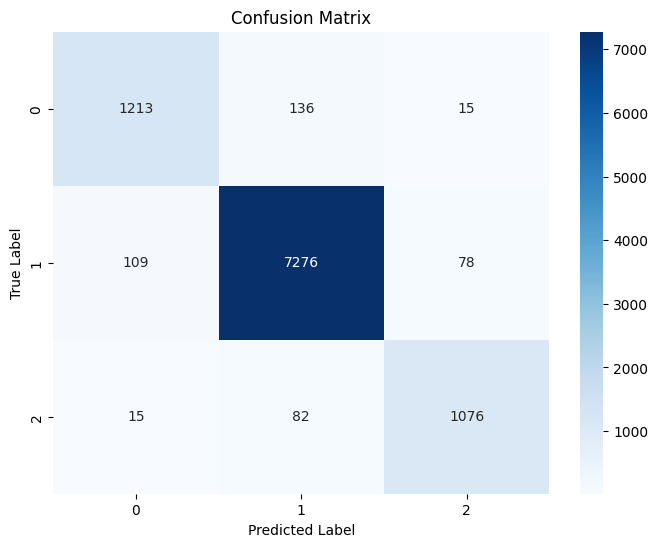

In [ ]:
# evalute how the created model work with the tested data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test data
y_pred = dt.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
pred_dt = dt.predict(X_test)
pred_dt

array([1, 1, 1, ..., 2, 1, 2])

In [ ]:
dt = classification_report(y_test,pred_dt)
print(dt)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1364
           1       0.97      0.97      0.97      7463
           2       0.92      0.92      0.92      1173

    accuracy                           0.96     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.96      0.96      0.96     10000



# **XGBOOST**

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

In [ ]:
pred = knn.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 1])

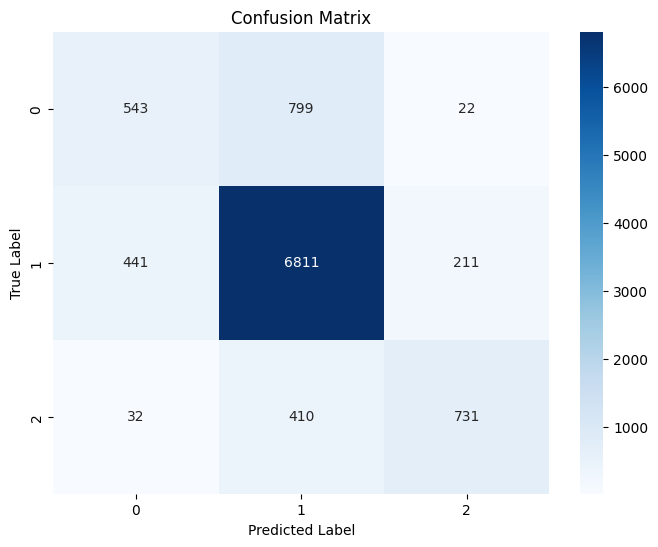

In [ ]:
# evalute how the created model work with the tested data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test data
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
knn = classification_report(y_test,pred)
print(knn)

              precision    recall  f1-score   support

           0       0.53      0.40      0.46      1364
           1       0.85      0.91      0.88      7463
           2       0.76      0.62      0.68      1173

    accuracy                           0.81     10000
   macro avg       0.71      0.64      0.67     10000
weighted avg       0.80      0.81      0.80     10000



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define the XGBoost model parameters
params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'objective': 'binary:logistic',
    'seed': 42
}

# Train the XGBoost model
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

# Test the XGBoost model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.24%


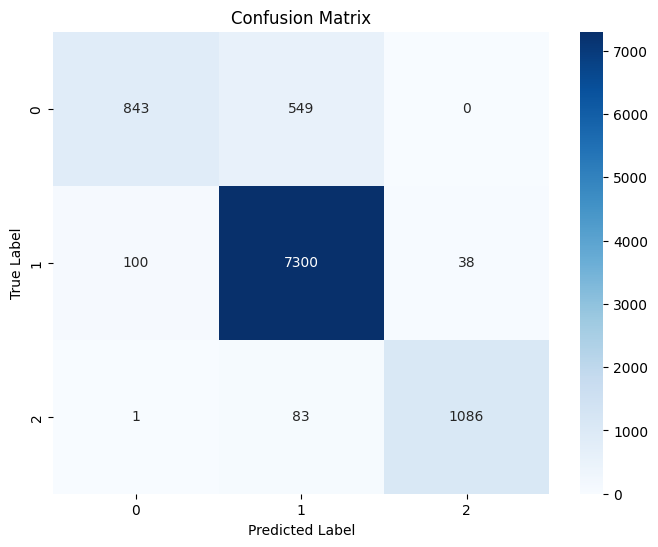

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Get the predicted labels for the test data
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.89      0.61      0.72      1392
           1       0.92      0.98      0.95      7438
           2       0.97      0.93      0.95      1170

    accuracy                           0.92     10000
   macro avg       0.93      0.84      0.87     10000
weighted avg       0.92      0.92      0.92     10000

